# 1 - Flat Field: Tree Ring Singal

Author: Johnny Esteves, University Of Michigan

### Description
In this notebook, you'll measure the tree ring singal on super flat field images for the R02 S02 (ITL) and R22 S11 (e2v) sensors.



In [1]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import glob
import numpy as np
import fitsio as fits

import matplotlib.pyplot as plt
plt.rc('image', interpolation='bicubic', origin='lower', cmap = 'viridis')
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['figure.figsize'] = [14.0, 10.0]
plt.rcParams['font.size'] = 16
rcParams = plt.rcParams.copy()

# Load Data


### Super Flat Files

In [2]:
## 10 superflat images

path= '/gpfs/slac/lsst/fs2/u1/devel/arasmus/to_johnny/output/'
itl = 'R02_S02_RTM-013_acqid_10984_R02_S02_H_median.fits'
etv = 'R22_S11_RTM-024_acqid_11351_R22_S11_H_median.fits'

In [3]:
path= '/gpfs/slac/lsst/fs2/u1/devel/arasmus/to_johnny/output/'
itl2= 'R02_S02_R02_S02_H_median.fits'
etv2= 'R22_S11_R22_S11_H_median.fits'

## Super Flats from the RTM-013/024

In [4]:
# itl = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-11021_RTM/LCA-11021_RTM-013/10982/dark_defects_raft/v0/85196/ITL-3800C-%i_median_sflat.fits' 
# itl2= '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-11021_RTM/LCA-11021_RTM-013/10982/dark_defects_raft/v0/85196/ITL-3800C-%i_dark_pixel_mask.fits' 
# itl = itl%(205)
# itl2= itl2%(205)

# image = np.rot90(make_ccd_mosaic(itl).getArray())
# mask  = np.rot90(make_ccd_mosaic(itl2).getArray())
# image[mask>0] = 0.

# etv = '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-11021_RTM/LCA-11021_RTM-024/11318/dark_defects_raft/v0/88033/E2V-CCD250-%i_median_sflat.fits' 
# etv2= '/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_archive/LCA-11021_RTM/LCA-11021_RTM-024/11318/dark_defects_raft/v0/88033/E2V-CCD250-%i_dark_pixel_mask.fits' 
# etv = etv%(382)
# etv2= etv2%(382)

In [5]:
from astropy.io import fits
def get_fits(fname):
    hdulist = fits.open(fname)
    image = hdulist[1].data
    return image,hdulist

def load_image(fname,sensor='itl',overwrite=False):
    if (os.path.isfile('tmp/%s_flat.fits'%(sensor))) & (not overwrite):
        fname = 'tmp/%s_flat.fits'%(sensor)
        print('tmp: found flat field')
        print(fname)
        image, hdulist = get_fits(fname)
    else:
        image, hdulist = get_fits(fname)
        image = image-np.median(image)
        ## save the file locally
        hdulist[1].data = image
        hdulist.writeto('tmp/%s_flat.fits'%sensor,overwrite=True)
    return image, hdulist

# ITL Tree Ring Signal

In [6]:
image, hdu = load_image(path+itl2,sensor='itl',overwrite=False)

## row flipped
image = np.flip(image,0)

tmp: found flat field
tmp/itl_flat.fits


In [7]:
## Checking image shape: (4000, 4072)

image.shape

(4000, 4072)

### Tree Ring Analysis

In [8]:
from tree_ring_helper import *

In [9]:
ring_itl = tree_ring_tools(sensor='ITL',loc=0)

ring_itl.img_cut = 100.*image
ring_itl.img     = 100.*image

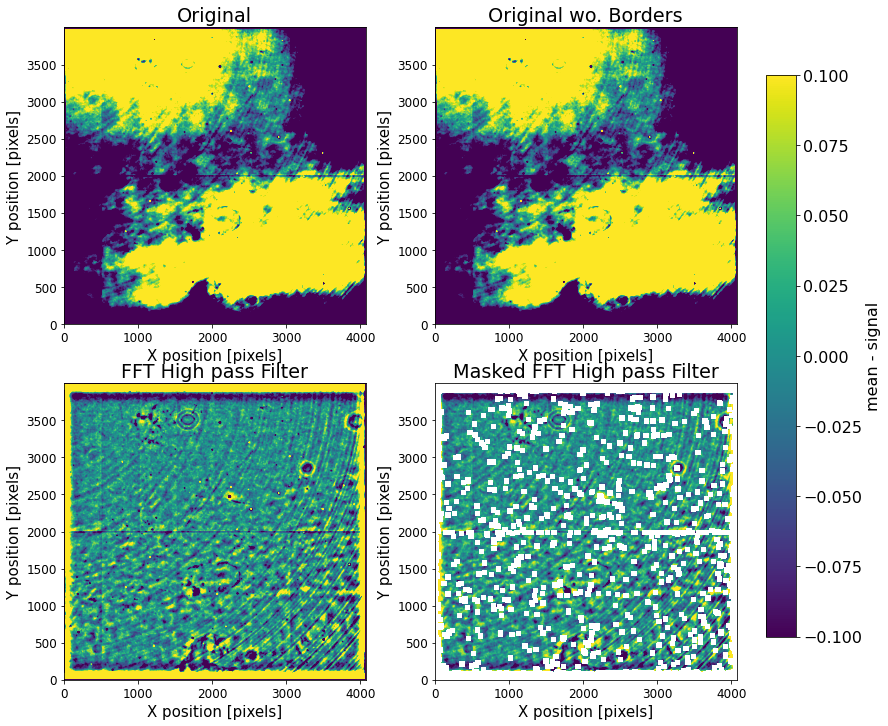

In [10]:
## always run in the following order
ring_itl.apply_high_freq_filter()
ring_itl.apply_gaussian_filter(downscale=2)
ring_itl.apply_mask(downscale=8,threshold=0.5)

ring_itl.set_ylabel(r'mean - signal')
ring_itl.set_levels([-0.1,0.1])
ring_itl.display_images()

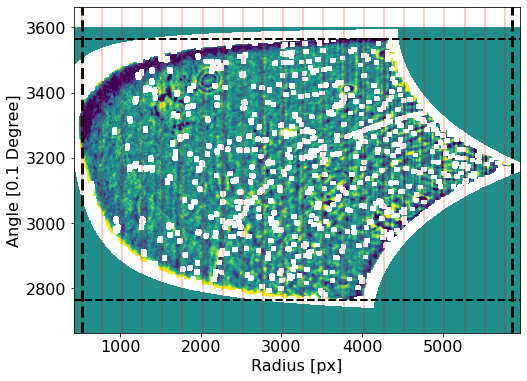

In [11]:
ring_itl.make_polar_transformation(rborder=70.)
ring_itl.check_polar_transfomartion()

(3100.0, 5340.0)

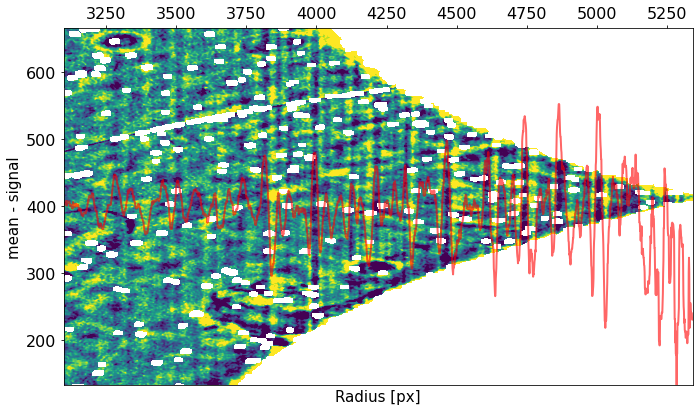

In [12]:
ring_itl.compute_signal(zeroNan=True)
ring_itl.plot_superposition_polar_signal()
plt.xlim(3100,)

In [13]:
ring_itl.save_profile('flat')

saving: profiles/polar_ITL_flat.npy


# E2V Tree Ring Signal

In [15]:
from astropy.io import fits
image, hdu = load_image(path+etv2,sensor='etv',overwrite=False)

## row flipped
image = np.flip(image,0)

tmp: found flat field
tmp/etv_flat.fits


In [16]:
## Checking image shape: (4000, 4072)

image.shape

(4004, 4096)

### Tree Ring Analysis

In [17]:
from tree_ring_helper import *

In [18]:
ring_e2v = tree_ring_tools(sensor='e2v',loc=3)

ring_e2v.img_cut = 100.*image
ring_e2v.img     = 100.*image

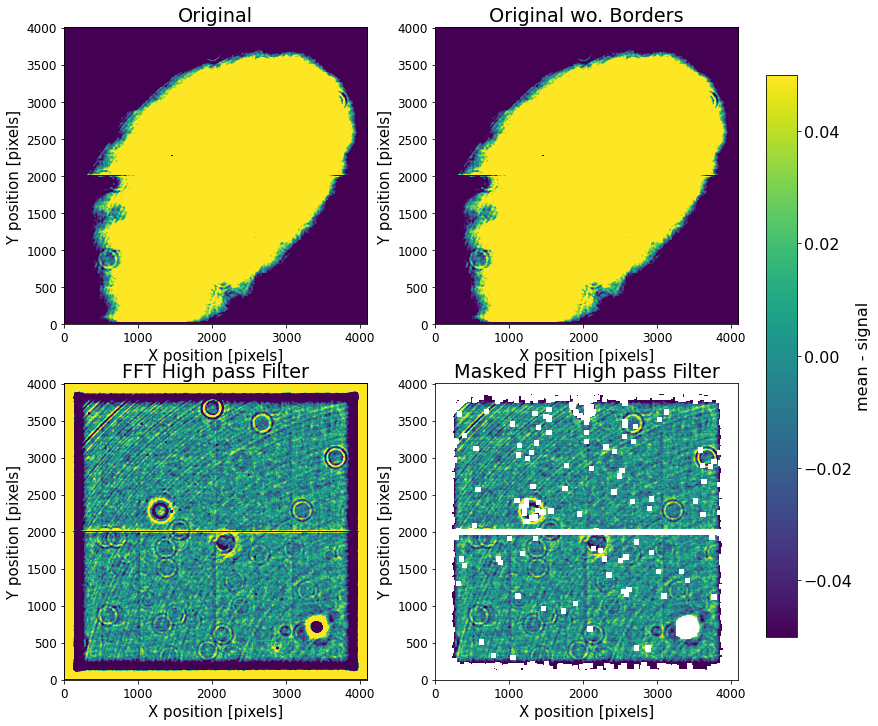

In [19]:
## always run in the following order
ring_e2v.apply_high_freq_filter()
ring_e2v.apply_gaussian_filter(downscale=2)
ring_e2v.apply_mask(downscale=8,threshold=0.3)

ring_e2v.set_ylabel(r'mean - signal')
ring_e2v.set_levels([-0.05,0.05])
ring_e2v.display_images()

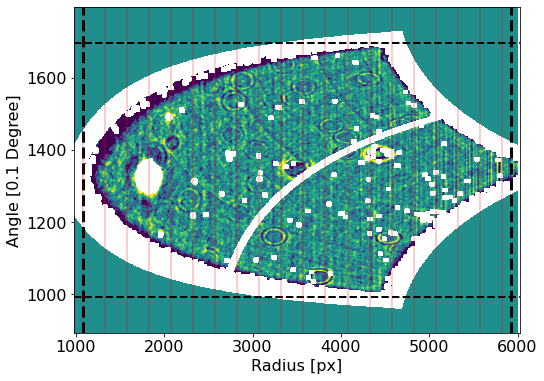

In [20]:
ring_e2v.set_levels([-0.05,0.05])
ring_e2v.make_polar_transformation(rborder=70.)
ring_e2v.check_polar_transfomartion()

(3100.0, 4854.0)

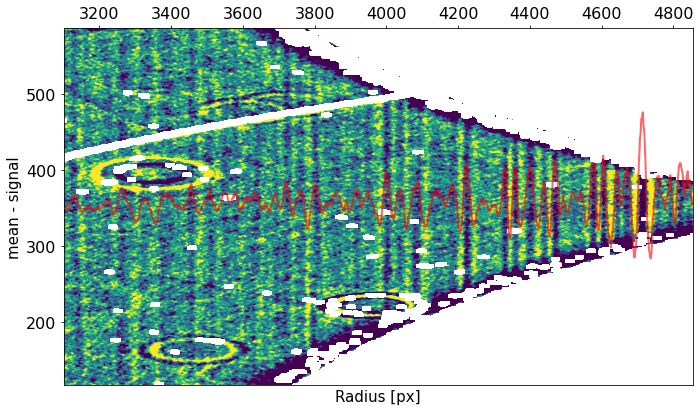

In [21]:
ring_e2v.compute_signal(zeroNan=True)
ring_e2v.plot_superposition_polar_signal()
plt.xlim(3100,)

In [22]:
ring_e2v.save_profile('flat')

saving: profiles/polar_e2v_flat.npy
